## ФИО студента: Васильев Кирилл Николаевич
## Группа: 18-ИВТ-2
## Вариант: 4
## Задание: mushrooms

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных;приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PRили ROCкривая)
4.	Выполните масштабирование количественных признаков;Постройте диаграммы BoxPlotдля признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCVи перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех».Оцените точность классификации для каждой их схем. Постройте кривые PRи ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества).Для линейного классификатора используйте регуляризацию.
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


### Задание 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [3]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [4]:
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


### Смотрим на названия столбцов

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
df.shape #Количество записей

(8124, 23)

In [6]:
#____________________________________________________________________________________________

1. cap-shap - форма шляпки
2. cap-surface - поверхность шляпки
3. cap-color - цвет шляпки
4. bruises - пятна
5. odor - запах
6. gill-attachment - форма жабер
7. gill-spacing - расстояние между жабрами
8. gill-size - размер жабер
9. gill-color - цвет жабер
10. stalk-shape - форма ножки
11. stalk-root - корень
12. stalk-surface-above-ring - форма ножки выше юбки
13. stalk-surface-below-ring - форма ножки ниже юбки
14. stalk-color-above-ring - цвет ножки выше юбки
15. stalk-color-below-ring - цвет ножки ниже юбки
16. veil-type - форма юбки
17. veil-color - цвет юбки
18. ring-number - количество колец
19. ring-type - тип кольца
20. spore-print-color - цвет спор
21. population - популяция
22. юhabitat - среда обитания

### 2. Удаляем дубликаты

In [7]:
df = df.drop_duplicates()
print('Длина после удаления:', len(df))

Длина после удаления: 8124


### 3. Оцените сбалансированность данных по классам

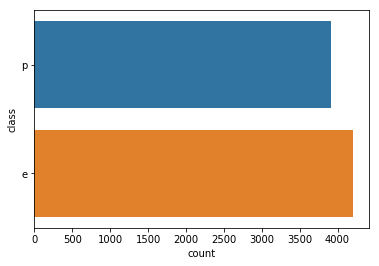

In [8]:
sns.countplot(data=df, y='class')

#### Вывод: классы сбалансированны

### 4. Выполните масштабирование количественных признаков

В наборе нет количественных признаков, масштабирование не требуется

### 5. Выполните замену категориальных признаков

In [9]:
categorical = [column for column in df.columns if df[column].dtype.name == 'object']
print(f"Категоиальные признаки: {categorical}")

Категоиальные признаки: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [10]:
print('Количество котегориальлных признаков:', len(categorical))

Количество котегориальлных признаков: 23


In [11]:
print('Количество признаков:', len(df.columns))

Количество признаков: 23


Вывод все признаки катигориальные

Выполняем замену 

In [12]:
for column in df:
    df[column] = pd.Series(label_encoder.fit_transform(df[column]))
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


### 6. Оцените корреляцию между признаков

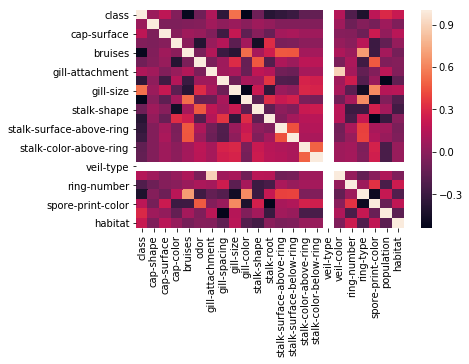

In [13]:
sns.heatmap(df.corr())

In [14]:
df = df.drop('veil-type', axis=1)
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

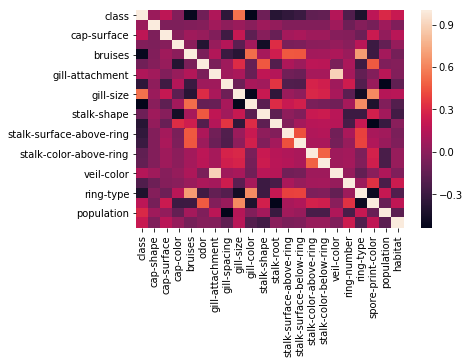

In [15]:
sns.heatmap(df.corr())

### 7. Заполните пропущенные значения в данных

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 22 columns):
class                       8124 non-null int64
cap-shape                   8124 non-null int64
cap-surface                 8124 non-null int64
cap-color                   8124 non-null int64
bruises                     8124 non-null int64
odor                        8124 non-null int64
gill-attachment             8124 non-null int64
gill-spacing                8124 non-null int64
gill-size                   8124 non-null int64
gill-color                  8124 non-null int64
stalk-shape                 8124 non-null int64
stalk-root                  8124 non-null int64
stalk-surface-above-ring    8124 non-null int64
stalk-surface-below-ring    8124 non-null int64
stalk-color-above-ring      8124 non-null int64
stalk-color-below-ring      8124 non-null int64
veil-color                  8124 non-null int64
ring-number                 8124 non-null int64
ring-type                   8

Пропущеных значений нет

### 8. Решите поставленную задачу классификации в соответствии с заданием.

In [59]:
from random import randint
train_x, test_x, train_y, test_y = train_test_split(df.drop('class', axis=1).values, 
                                                    df['class'].values, 
                                                    test_size=0.3,
                                                    random_state = 10)
print(train_x, test_x, train_y, test_y)

[[2 3 2 ..., 7 4 4]
 [5 0 2 ..., 2 5 0]
 [5 0 3 ..., 3 5 0]
 ..., 
 [2 3 3 ..., 1 5 1]
 [3 2 3 ..., 7 2 1]
 [2 2 8 ..., 2 0 1]] [[5 3 8 ..., 2 2 1]
 [2 2 4 ..., 2 3 5]
 [5 2 8 ..., 2 3 1]
 ..., 
 [2 2 5 ..., 5 4 1]
 [2 3 2 ..., 3 4 0]
 [5 2 9 ..., 3 2 3]] [1 0 0 ..., 1 0 0] [0 1 0 ..., 1 0 0]


классификатор Kближайших соседей (задаётся количество ближайших объектов):

In [89]:
knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, {'n_neighbors': list(range(1, 5))})
knn_grid.fit(train_x, train_y)
n = knn_grid.best_estimator_.n_neighbors
best = knn_grid.best_score_
print('best score:', best, ', neighbors num:', n)

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)
print('Accuracy knn: %.f' % accuracy_score(test_y, knn_predict))

best score: 0.998944776644 , neighbors num: 1
Accuracy knn: 1


логический классификатор (бинарное решающее дерево)

In [90]:
dtc = DecisionTreeClassifier()

dtc_grid = GridSearchCV(dtc, {'max_depth': list(range(1, 5)), 'max_features': list(range(1, 5))})
dtc_grid.fit (train_x, train_y)
best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_

print('best score:', best_score, 
      ', features number:', best_features,
      ', depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(train_x, train_y)
best_score = np.mean(test_y == dtc.predict(test_x))
print('test score:', best_score)

best score: 0.935983116426 , features number: 4 , depth: 3
test score: 0.853978671042


#### Графики

In [91]:
proba_knn = knn.predict_proba(test_x)

proba_dtc = dtc.predict_proba(test_x)

inversion = [1-y for y in test_y]

PR график

In [63]:
def addPlotPr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

ROC график

In [64]:
def addPlotRoc0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

def addPlotRoc1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

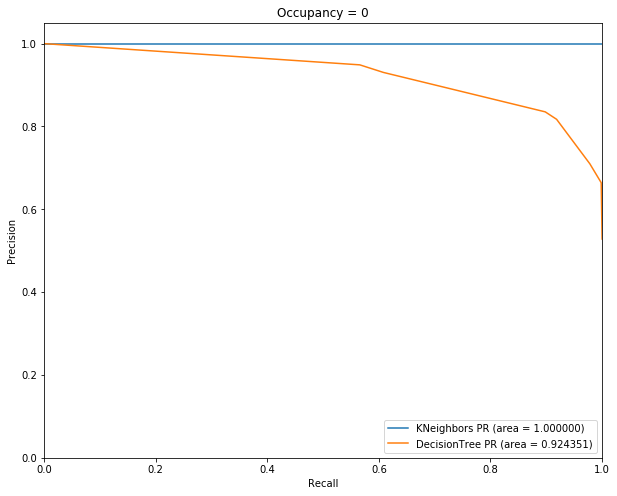

In [92]:
plt.figure(figsize=(10,8))

addPlotPr(proba_knn, 0, 'KNeighbors', inversion)
addPlotPr(proba_dtc, 0, 'DecisionTree', inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Occupancy = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

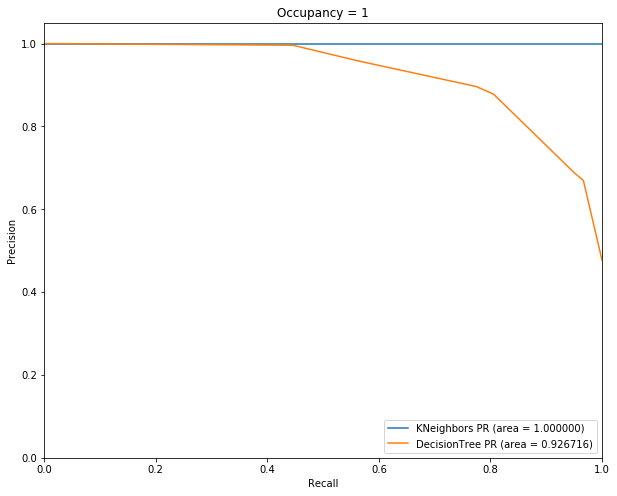

In [93]:
plt.figure(figsize=(10,8))

addPlotPr(proba_knn, 1, 'KNeighbors', test_y)
addPlotPr(proba_dtc, 1, 'DecisionTree', test_y)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Occupancy = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()

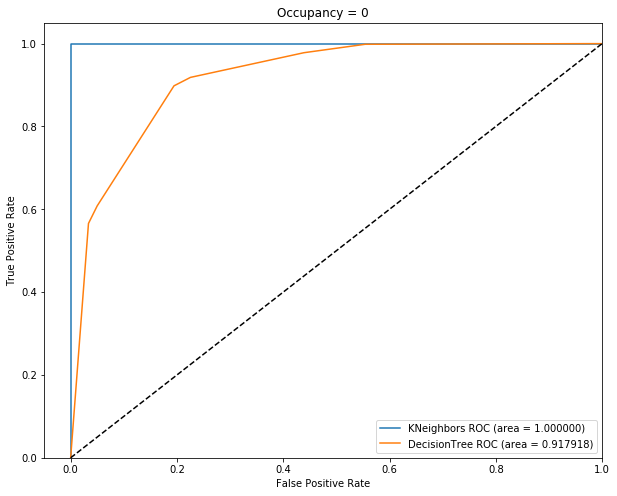

In [94]:
plt.figure(figsize=(10,8))

addPlotRoc0(proba_knn, 'KNeighbors', test_y)
addPlotRoc0(proba_dtc, 'DecisionTree', test_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 0')
plt.show()

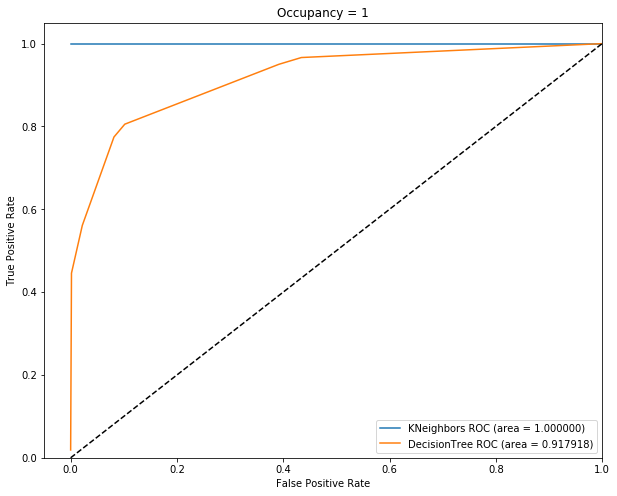

In [95]:
plt.figure(figsize=(10,8))

addPlotRoc1(proba_knn, 'KNeighbors', test_y)
addPlotRoc1(proba_dtc, 'DecisionTree', test_y)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Occupancy = 1')
plt.show()


### 9. Cравните кривые для классификаторов

Классификатор Kближайших соседей показал себя эффективнее на данной выборке